## Tensorboard 연결하기

In [48]:
%matplotlib inline

!pip install tensorboardcolab
import tensorboardcolab
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

## 예제 데이터 )  난수로 만든 데이터 셋

아래는 10000개의 랜덤으로 만들어진 데이터 셋입니다.<br>
강한 선형 관계를 가지고 있습니다.<br>

우리는 여기서 X,Y 사이에서 어떤 기울기와 편차를 가지고 있는지를 확인해 보도록 하겠습니다.

[ 0.21907802 -0.42096414  0.76085211 ...  0.80222851  0.34471852
  0.48480045]
[0.3175563  0.28842808 0.38426707 ... 0.40177301 0.30281804 0.3850106 ]


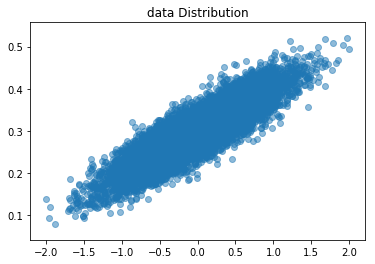

In [58]:
num_data = 10000 # 데이터의 수 

data_X = np.random.normal(0,0.55,[num_data])
data_Y = data_X * 0.1 + 0.3 + np.random.normal(0,0.03,[num_data])

print(data_X)
print(data_Y)

plt.title("data Distribution")
plt.scatter(data_X, data_Y, c='C0', 
            label='Original data', alpha=0.5)
plt.show()

+ 아래 코드는 다음 시간에 배울 linear regression 을 텐서플로우로 구현해 놓은 코드 입니다.
+ 우선 `Graph`로 Linear Regression의 연산들을 정의합니다.

In [0]:
graph = tf.Graph()
with graph.as_default():
    xs = tf.placeholder(tf.float32, shape=(None,), name='x')
    y_true = tf.placeholder(tf.float32, shape=(None,), name='y_true')

    # 변수 초기화
    with tf.variable_scope('weights'):
        W = tf.Variable(tf.random.normal([1]),"W")
        b = tf.Variable(tf.zeros([1]),'b')

    # Model
    with tf.variable_scope("Linear_Regression"):
        y_pred = W * xs + b
    y_pred = tf.identity(y_pred, name="y_pred")
    
    # Loss Function
    with tf.variable_scope("losses"):
        loss = tf.reduce_mean(tf.square(y_pred - y_true))
    
    # Optimizer
    train_op = (tf.train
                .GradientDescentOptimizer(0.01)
                .minimize(loss))

+ 아래는 `Session`을 통해 Linear Regression을 학습하는 과정입니다.

In [0]:
with graph.as_default():
    sess = tf.Session(graph=graph)
    sess.run(tf.global_variables_initializer())

    # Training loop
    for _ in range(1000):
        sess.run(train_op,feed_dict={xs:data_X,y_true:data_Y})
    W_, b_ = sess.run([W,b])

* 위의 모델이 학습이 끝난 후의 결과입니다.

학습된 Weight : 0.100 Bias : 0.300


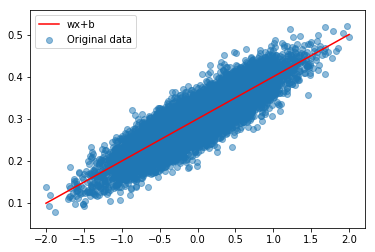

In [61]:
print("학습된 Weight : {:.3f} Bias : {:.3f}".format(W_[0], b_[0]))
# visualization data
plt.scatter(data_X, data_Y, c='C0', label='Original data', alpha=0.5)

pred_X = np.array([-2.,2.])
pred_Y = sess.run(y_pred, feed_dict={xs:pred_X})
preds = np.stack([pred_X,pred_Y])
plt.plot(pred_X,pred_Y, color='r', label='wx+b')

plt.legend()
plt.show()

## 문제 1. 학습 과정 시각화하기

* 위의 방식으로 학습을 할 경우, 우리는 학습 과정 중에 어떤식으로 가중치가 변하는지 확인할 수 없습니다. Tensorboard를 통해, 학습 과정을 시각화해 보겠습니다.

아래 코드에 다음 조건을 만족하도록 수정해 주세요! <br>

조건 1. graph tensorbaord 에 연결 <br>
조건 2. W, B, loss 는 scalar summary 노드를 이용해 시각화 <br>
조건 3. W, B, loss 는 step 별로 추적 <br>

In [67]:
# 우선 실행해주세요
graph = tf.Graph()
with graph.as_default():
    xs = tf.placeholder(tf.float32, shape=(None,), name='x')
    y_true = tf.placeholder(tf.float32, shape=(None,), name='y_true')

    # 변수 초기화
    with tf.variable_scope('weights'):
        W = tf.Variable(tf.random.normal([1]),"W")
        b = tf.Variable(tf.zeros([1]),'b')

    # Model
    with tf.variable_scope("Linear_Regression"):
        y_pred = W * xs + b
    y_pred = tf.identity(y_pred, name="y_pred")
    
    # Loss Function
    with tf.variable_scope("losses"):
        loss = tf.reduce_mean(tf.square(y_pred - y_true))
    
    # Optimizer
    train_op = (tf.train
                .GradientDescentOptimizer(0.01)
                .minimize(loss))
    
log_dir = "./log/"
tbc = tensorboardcolab.TensorBoardColab(graph_path=log_dir)

print(W)
print(b)

print(xs)

Wait for 8 seconds...
TensorBoard link:
https://356cec50.ngrok.io
<tf.Variable 'weights/Variable:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'weights/Variable_1:0' shape=(1,) dtype=float32_ref>
Tensor("x:0", shape=(?,), dtype=float32)


#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 텐서보드의 로그 디렉토리는 `./log/`에 담아주세요

In [0]:
# 정답을 입력해주세요
# 아래 학습 과정 중에 텐서보드를 선언하고
# Summary 연산을 통해 올려 주세요



with graph.as_default():

    tb_W = tf.summary.scalar(name='W', tensor=W[0])
    tb_b = tf.summary.scalar(name='b', tensor=b[0])
    tb_loss = tf.summary.scalar(name='loss', tensor=loss)

    writer = tf.summary.FileWriter(logdir=log_dir)
    writer.add_graph(graph=tf.get_default_graph())

    merged_all = tf.summary.merge_all()
    
    sess = tf.Session(graph=tf.get_default_graph())
    sess.run(tf.global_variables_initializer())

    for step in range(1000):
        _, summary_values = sess.run([train_op, merged_all], feed_dict={xs:data_X, y_true:data_Y})
        writer.add_summary(summary_values, step)
# writer.flush()
        

#### 정답 확인
* 정답이 아래와 같이 나타나면 됩니다.
* 텐서 보드를 실행후 아래와 같은 그림이 나올수 있도록 아래 코드를 수정합니다.

![Imgur](https://i.imgur.com/CrtFMfz.png)
![Imgur](https://i.imgur.com/71atRw2.png)